In [1]:
import geopandas as gpd
import pandas as pd
import sqlite3
import xgboost as xgb
from pathlib import Path
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def geoPaths()->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    return dc2.joinpath("data/unzipped/map")


In [3]:
mapDir = geoPaths()
barnetLSOA = mapDir.joinpath("barnet_lsoa.geojson")
barnet_map = gpd.read_file(barnetLSOA)
barnet_map= barnet_map[['geometry', 'lsoa11cd']]
barnet_map.rename(columns={'lsoa11cd': 'LSOA code'}, inplace=True)


In [4]:
def dbPath() -> Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    db = dc2.joinpath("data/database_final.db")
    return db


def modelPath(lsoaCode:str) ->Path:
    cwd = Path.cwd()
    dc2 = cwd.parent
    modelPath = dc2.joinpath(f"data/models/{lsoaCode}.bin")
    return modelPath


In [5]:
conn = sqlite3.connect(dbPath())
query_unemployement = "SELECT * FROM montly_unemployement_claimant_count_by_lsoa_barnet"
unemployement = pd.read_sql(query_unemployement, conn)
unemployement = unemployement.rename(columns={"geogcode":"LSOA code"})
unemployement.drop(columns=["index"], inplace=True)
unemployement.dropna(inplace=True)
unemployement["date"] = pd.to_datetime(unemployement["date"])
singleMonth = unemployement[(unemployement["date"].dt.month==12)&(unemployement["date"].dt.year ==2014)]


In [6]:
# singleMonth.drop(columns=["index"], inplace=True);

In [7]:
singleMonth

,LSOA code,date,value
347,E01000248,2014-12-01,10.0
795,E01000249,2014-12-01,5.0
1243,E01000250,2014-12-01,20.0
1691,E01000254,2014-12-01,10.0
2139,E01000292,2014-12-01,10.0
...,...,...,...
93083,E01000137,2014-12-01,30.0
93531,E01000139,2014-12-01,15.0
93979,E01000140,2014-12-01,30.0
94427,E01000143,2014-12-01,40.0


In [8]:

merged = pd.merge(barnet_map, singleMonth, on=["LSOA code"])

In [9]:
merged

,geometry,LSOA code,date,value
0,"POLYGON ((-0.13844 51.63652, -0.13534 51.63512...",E01000115,2014-12-01,15.0
1,"POLYGON ((-0.14836 51.63712, -0.14759 51.63628...",E01000116,2014-12-01,5.0
2,"POLYGON ((-0.15362 51.63381, -0.15445 51.63321...",E01000117,2014-12-01,25.0
3,"POLYGON ((-0.15155 51.63453, -0.14967 51.63363...",E01000118,2014-12-01,15.0
4,"POLYGON ((-0.13399 51.63405, -0.13395 51.63361...",E01000119,2014-12-01,5.0
...,...,...,...,...
204,"POLYGON ((-0.17462 51.62222, -0.17482 51.62145...",E01000320,2014-12-01,15.0
205,"POLYGON ((-0.17381 51.62378, -0.17374 51.62305...",E01000321,2014-12-01,30.0
206,"POLYGON ((-0.17609 51.61923, -0.17609 51.61873...",E01000322,2014-12-01,20.0
207,"POLYGON ((-0.17189 51.61706, -0.17212 51.61653...",E01000323,2014-12-01,25.0


<Axes: >

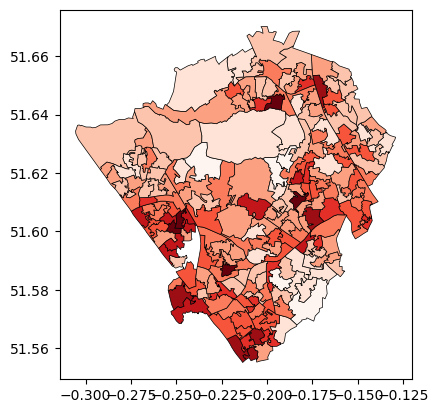

In [10]:
fig, axs = plt.subplots(1,1)
merged.plot(column = "value", cmap = "Reds", edgecolors="black",linewidth=0.5, ax=axs)

In [11]:
plt.show()

/home/maxwell/anaconda3/lib/python3.10/site-packages/matplotlib/animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


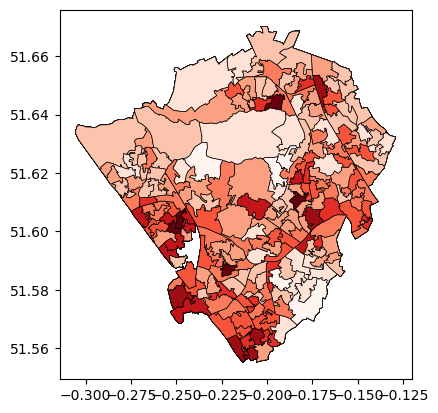

In [13]:
fig, axs = plt.subplots(1,1)

artist = []
for intMonth in range(1,13):
    singleFrame = unemployement[(unemployement["date"].dt.month==intMonth)&(unemployement["date"].dt.year ==2014)]
    merged = pd.merge(barnet_map, singleMonth, on=["LSOA code"])
    container = merged.plot(column = "value", cmap = "Reds", edgecolors="black",linewidth=0.5, ax=axs)
    artist.append(container)

anim = animation.ArtistAnimation(fig=fig, artists=artist)
plt.show()

In [124]:

plt.show()

In [ ]:
def update(frame):
    ax.clear()
    ax.set_title(str(frame))
